# Skills count %

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [4]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


/var/folders/br/42nb5mtj2d7d1fqq286wvwtr0000gp/T/ipykernel_82400/278881192.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='skill', x='percent', ax=ax, palette=palette)
/var/folders/br/42nb5mtj2d7d1fqq286wvwtr0000gp/T/ipykernel_82400/278881192.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='skill', x='percent', ax=ax, palette=palette)
/var/folders/br/42nb5mtj2d7d1fqq286wvwtr0000gp/T/ipykernel_82400/278881192.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='skill', x='percent', ax=ax, palette=p

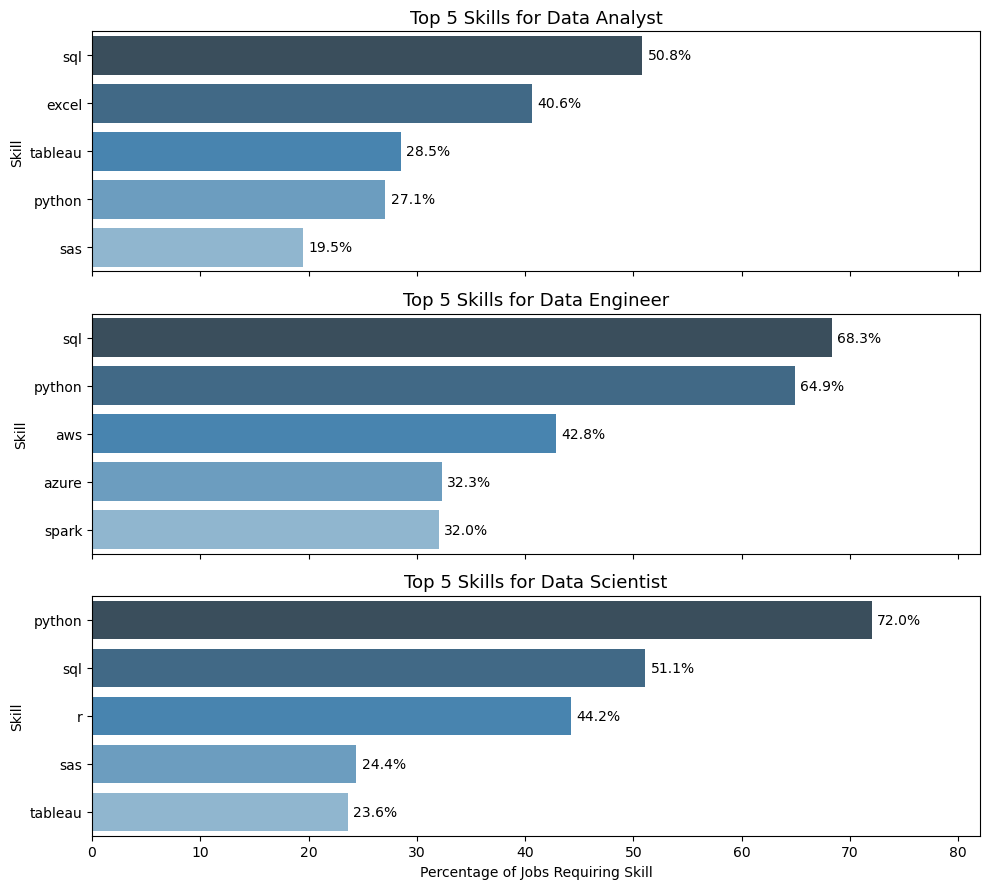

In [41]:
# Filter for jobs in the United States
df_US = df[df['job_country'] == 'United States']

# Function to calculate top 5 skills and their percentages for a specific job title
def get_top_skills(job_title):
    df_US_job_specific = df_US[df_US['job_title_short'] == job_title]
    total_jobs = len(df_US_job_specific) # Total number of jobs for the specific title
    
    # Explode the job_skills column to get each skill in a separate row 
    df_US_job_specific_exploded = df_US_job_specific.explode('job_skills')

    # Calculate the number of unique jobs that have each skill
    skill_counts = df_US_job_specific_exploded['job_skills'].value_counts().head(5)

    # Calculate the percentage of jobs requiring each skill
    skill_percentages = (skill_counts / total_jobs * 100).round(1)

    return skill_percentages


# Get top 5 skills for each job title in a Series
data_analyst_skills = get_top_skills('Data Analyst')
data_engineer_skills = get_top_skills('Data Engineer')
data_scientist_skills = get_top_skills('Data Scientist')

# Plot the horizontal bar charts
fig, axes = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

# Define a function to plot each bar chart
def plot_skills(ax, skills, title):
    # Convert Series to DataFrame
    df = skills.reset_index()
    df.columns = ['skill', 'percent']

    # Plot with seaborn
    palette = sns.color_palette("Blues_d", len(df))[::-1]  # Reverse the colors
    sns.barplot(data=df, y='skill', x='percent', ax=ax, palette=palette)
    # Add labels on bars
    for i, v in enumerate(df['percent']):
        ax.text(v + 0.5, i, f'{v}%', va='center', fontsize=10)

    # Titles and labels
    ax.set_title(title, fontsize=13)
    ax.set_xlabel('Percentage of Jobs Requiring Skill')
    ax.set_ylabel('Skill')
    ax.set_xlim(0, df['percent'].max() + 10)  # Extra space for label text

# Plot for each job title
plot_skills(axes[0], data_analyst_skills, 'Top 5 Skills for Data Analyst')
plot_skills(axes[1], data_engineer_skills, 'Top 5 Skills for Data Engineer')
plot_skills(axes[2], data_scientist_skills, 'Top 5 Skills for Data Scientist')

plt.tight_layout()
plt.show()